# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# Your code here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)

In [2]:
df = pd.read_csv('data/PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Columns information:
- step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

- type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- amount - amount of the transaction in local currency.


- nameOrig - customer who started the transaction


- oldbalanceOrg - initial balance before the transaction


- newbalanceOrig - new balance after the transaction


- nameDest - customer who is the recipient of the transaction


- oldbalanceDest - initial balance of recipient before the transaction.


- newbalanceDest - new balance of recipient after the transaction.


- isFraud - This is the transactions made by the fraudulent agents inside the simulation.


- isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [3]:
df.shape

(6362620, 11)

In [67]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# Check the column type:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
df.groupby('type')['isFraud'].value_counts()

type      isFraud
CASH_IN   0          1399284
CASH_OUT  0          2233384
          1             4116
DEBIT     0            41432
PAYMENT   0          2151495
TRANSFER  0           528812
          1             4097
Name: isFraud, dtype: int64

In [8]:
# check the fraud columns:
print(df.isFraud.value_counts())
print(df.isFlaggedFraud.value_counts())

0    6354407
1       8213
Name: isFraud, dtype: int64
0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


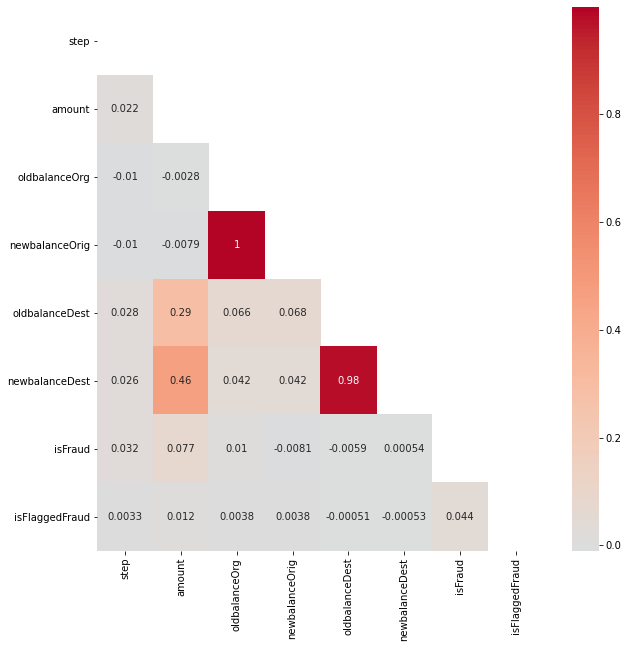

In [6]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, mask=mask)

In [68]:
'''
There are no NaNs.

The import features might be: Type (it has to be converted to numeric), amount

In the types, there are only two interesting types when fraud is commited: transfer 
and cash out

the column called isFlaggedFraud is unclear. It seems to be set before the 
transaction takes place
'''

'\nThere are no NaNs.\n\nThe import features might be: Type (it has to be converted to numeric), amount\n\nIn the types, there are only two interesting types when fraud is commited: transfer \nand cash out\n\nthe column called isFlaggedFraud is unclear. It seems to be set before the \ntransaction takes place\n'

### What is the distribution of the outcome? 

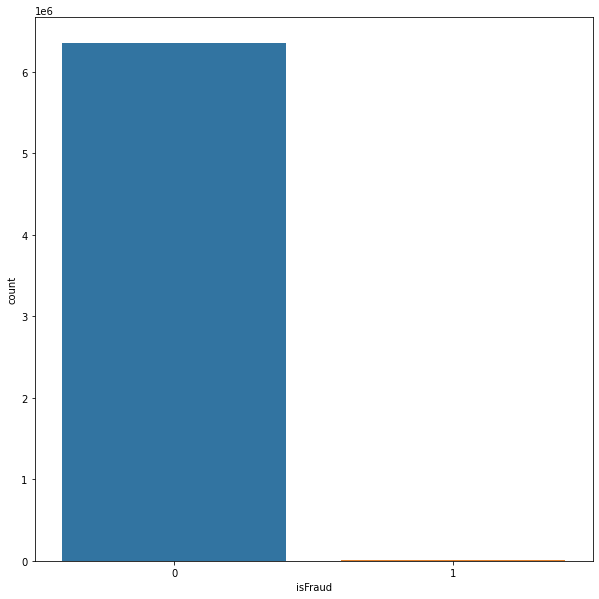

In [13]:
# Your response here
sns.countplot(df.isFraud)

In [30]:
fraud = len(df[df['isFraud']==1])/len(df) * 100
notfraud = len(df[df['isFraud']==0])/len(df) * 100
print(f'Fraud %: {round(fraud,2)}')
print(f'Not fraud %: {round(notfraud,2)}')

Fraud %: 0.13
Not fraud %: 99.87


### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [31]:
# Your code here

In [60]:
# As the fraud only occurs during TRANSFER and CASH_OUT types, 
# I will keep only those rows
    
df_new = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

# One hot encoding for labelled data in type
df_new = pd.get_dummies(df_new, columns=['type'], drop_first=True)

In [61]:
# Drop columns nameOrig and nameDest
df_new.drop(columns=['nameOrig', 'nameDest'], inplace=True)

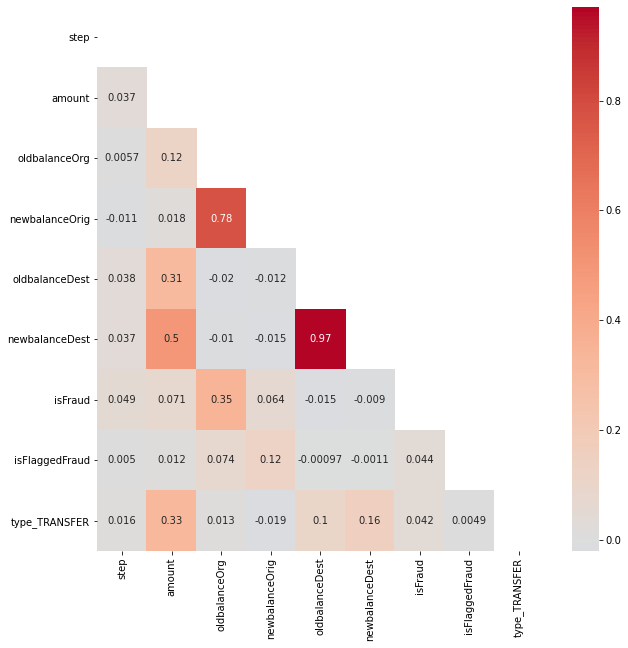

In [62]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_new.corr(), dtype=bool))

sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm', center=0, mask=mask)

In [63]:
# As newbalanceDest and oldBalanceDest have a high correleation, same for the origin. 
# I'm going to drop one of each
df_new.drop(columns=['newbalanceDest', 'newbalanceOrig'], inplace=True)

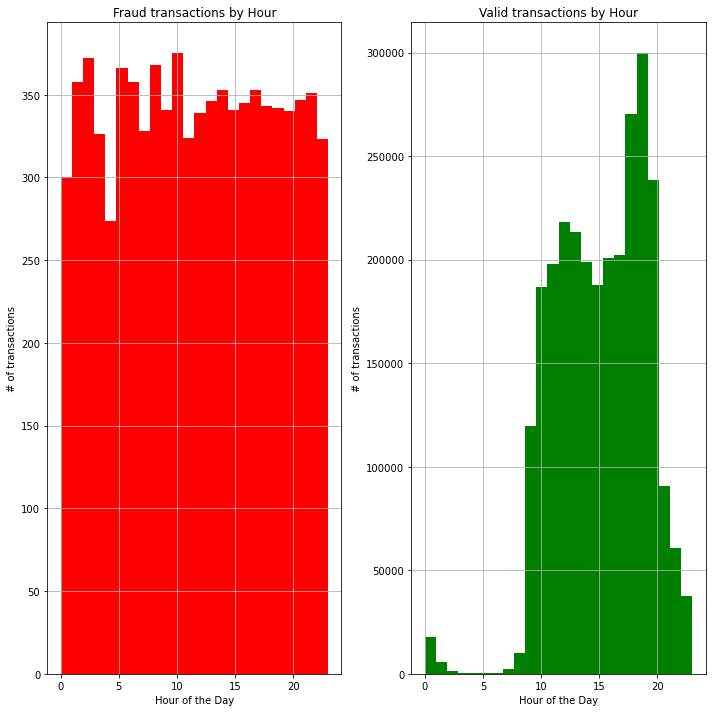

In [81]:
# Step: every step is 1h and there are 743 steps for 30 days of data. I'm going to
# convert them into 24h to check if there is a pattern in the hours when the fraud
# is more likely to happen

# getting hours and days of the week
num_days = 7
num_hours = 24
fraud_days = df_new[df_new['isFraud']==1].step % num_days
fraud_hours = df_new[df_new['isFraud']==1].step % num_hours
valid_days = df_new[df_new['isFraud']==0].step % num_days
valid_hours = df_new[df_new['isFraud']==0].step % num_hours

plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

In [82]:
# Create a new column/variable called HourOfDay which is modulo 24 of step column

df_new['HourOfDay'] = df_new['step']%24

In [87]:
# As there is a big range of values, it will be better to have them standarized:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df_new.drop(columns='isFraud', axis=1))

In [89]:
# Define y
y = df_new.isFraud

### Run a logisitc regression classifier and evaluate its accuracy.

In [88]:
# Your code here
from sklearn.linear_model import LogisticRegression

In [90]:
# divide in train and test
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 45)

In [92]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9976285098595514

In [98]:
# Check the classification report
from sklearn.metrics import classification_report, accuracy_score

In [97]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552483
           1       0.78      0.25      0.37      1599

    accuracy                           1.00    554082
   macro avg       0.89      0.62      0.69    554082
weighted avg       1.00      1.00      1.00    554082



In [100]:
accuracy_score(y_test, y_pred)

0.9976285098595514

### Now pick a model of your choice and evaluate its accuracy.

In [101]:
# Your code here

# I'm going to try with a random forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
forest = RandomForestClassifier()

In [105]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [106]:
forest.score(X_test, y_test)

0.9990488772419966

In [108]:
# Classification report
y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552483
           1       0.96      0.70      0.81      1599

    accuracy                           1.00    554082
   macro avg       0.98      0.85      0.90    554082
weighted avg       1.00      1.00      1.00    554082



### Which model worked better and how do you know?

In [ ]:
# Your response here

In [ ]:
# Random Forest performs better. The precision and recall parameters are higher.